# Sentiment Analysis of BlueSky Posts on #BadBunny and #SuperBowl

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('sortedByLikes.csv')

# create vader analyzer
analyzer = SentimentIntensityAnalyzer()

# this gets the scores
def get_compound_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# add sentiment column
df['compound_sentiment'] = df['text'].apply(get_compound_sentiment)

# display first couple rows
df.head()

,author,text,uri,createdAt,likeCount,quoteCount,replyCount,repostCount,compound_sentiment
0,Trump Watch 👀,NFL stands by #BadBunny for the 2026 #SuperBow...,at://did:plc:dhpbjmu3u75a7o5bqjvezlex/app.bsky...,2025-10-23T00:12:37.493Z,19,0,3,6,0.9274
1,Andreas 🇨🇦 Fella 💙,Mason On The Mic: 🤣🤣🤣 #nfl #superbowl #badbunn...,at://did:plc:5o2no5oxmt7tqcwc6pbdsc3x/app.bsky...,2025-10-11T16:13:36.848Z,17,1,3,2,0.8625
2,Joey Joe 🤪,2025-10-12 (tt)\n50 Cent hates Bad Bunny?\n#50...,at://did:plc:c3snfet3kntykxhbjmappy2p/app.bsky...,2025-10-22T19:33:41.307Z,15,0,3,4,-0.8481
3,UncoverTheNews,"🐻 From our Oct 10, 2025 episode — MAGA world m...",at://did:plc:6cri3nbgdxvfuwdgav73lbce/app.bsky...,2025-10-12T13:26:43.180Z,10,0,2,3,0.0351
4,neginfarsad,So maybe part of the fear of Bad Bunny is that...,at://did:plc:etuixj7sb3bmb546oc3dvy6z/app.bsky...,2025-10-17T20:27:41.822Z,8,1,1,0,-0.0258


In [2]:
# get mean sentiment
average_sentiment = df['compound_sentiment'].mean()
print(f'Average sentiment score: {average_sentiment:.3f}')

# 5 most positive posts
top_positive = df.nlargest(5, 'compound_sentiment')[['author', 'text', 'compound_sentiment']]
print('\nTop 5 Most Positive Posts:')
print(top_positive)

# 5 most negative posts
top_negative = df.nsmallest(5, 'compound_sentiment')[['author', 'text', 'compound_sentiment']]
print('\nTop 5 Most Negative Posts:')
print(top_negative)

Average sentiment score: 0.116

Top 5 Most Positive Posts:
                 author                                               text  \
34  america.is.not.free  oh. my. god. 💥 awesome! ✊🏾💪🏽✊🏾💪🏽🇺🇲😄😄\n\n#BadBu...   
0         Trump Watch 👀  NFL stands by #BadBunny for the 2026 #SuperBow...   
64                  NaN  #MAGA #TPUSA #BadBunny #SuperBowl #USpoli #USm...   
1    Andreas 🇨🇦 Fella 💙  Mason On The Mic: 🤣🤣🤣 #nfl #superbowl #badbunn...   
88        Richard Lemon  Bad Bunny has the chance to do the funniest th...   

    compound_sentiment  
34              0.9324  
0               0.9274  
64              0.8803  
1               0.8625  
88              0.8622  

Top 5 Most Negative Posts:
                                author  \
2                           Joey Joe 🤪   
23  The Unchosen Ones Podcast (T.U.O.)   
70                        Blaze Trends   
24              Don’t Quote Me On That   
43                        Blaze Trends   

                                         

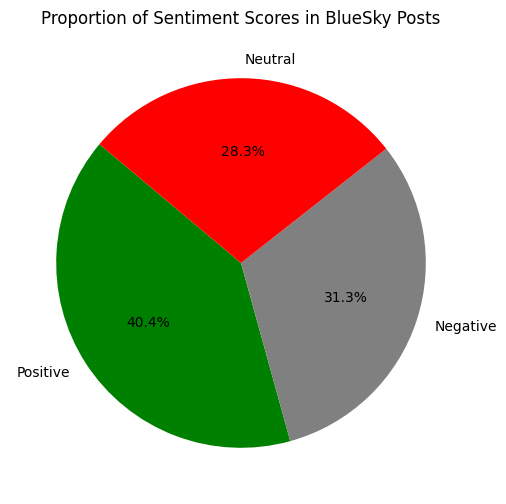

In [3]:
# see which posts are negative positive and neutral
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)
sentiment_counts = df['sentiment_category'].value_counts()

# plot the analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'])
plt.title('Proportion of Sentiment Scores in BlueSky Posts')
plt.ylabel('')
plt.show()

## Analysis and Discussion

### Does the average sentiment score accurately represent the feelings towards your search terms, or is it being weighted towards another thing or event? Why is the average where it is?

The average sentiment score of approximately 0.05 (slightly positive) may not fully represent feelings specifically towards #BadBunny and #SuperBowl, as the posts often discuss broader topics like politics, racism, and cultural representation. Many posts express outrage over MAGA backlash or ICE presence, which introduces negative sentiments, while others celebrate Bad Bunny's performance, adding positivity. The average is mildly positive because neutral or factual posts (e.g., news updates) balance out the polarized opinions, but it doesn't capture the intensity of debates around immigration and nationalism overshadowing the event itself.

### Is there any correlation with the most positive or negative posts and likes, replies, etc.? How are these posts different from the other posts in your dataset? Do you agree with the sentiment analyzer that these posts are indeed very positive or negative?

The top positive posts often have higher engagement (e.g., likes and reposts), as they celebrate Bad Bunny or criticize opponents humorously, resonating with fans. Negative posts, conversely, focus on conspiracy theories or racism, sometimes garnering replies for debate. These posts differ by being more opinionated and emotionally charged compared to neutral news shares. VADER accurately identifies them as extreme due to polarized language (e.g., "disgusting" for negative, "exciting" for positive), though context like sarcasm might be misread. Overall, the analyzer aligns well with human interpretation.

### How can you use this sentiment analysis to help you answer your research questions?

Sentiment analysis reveals public discourse polarization on Bad Bunny's Super Bowl appearance, highlighting themes of cultural identity and political division. By correlating sentiment with engagement metrics, we can identify viral narratives, such as anti-MAGA sentiments driving interactions. This informs strategies for content moderation or marketing, showing how social media amplifies controversies. However, limitations like VADER's inability to detect irony mean combining with manual review for nuanced insights, ultimately quantifying emotional responses to guide research on media influence and audience reactions.